# Simple Keras example of MNIST classifier

Keras, Tensorflow

**Features:**
- Code at start avoids full GPU memory allocation. Some interesting threads about this:
-- https://stackoverflow.com/questions/34199233/how-to-prevent-tensorflow-from-allocating-the-totality-of-a-gpu-memory
-- https://kobkrit.com/using-allow-growth-memory-option-in-tensorflow-and-keras-dc8c8081bc96
    

**TODO:**
- Avoid deprecated sentences
- Use own code for training (customize)



**Import data**

In [1]:
import keras as k
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


**Training configuration parameters**

In [5]:
batch_size = 256
num_classes = 10
epochs = 5

dropout_rate = 0.2


**Training and Test data reshape**

In [3]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

**Define net architecture, compile and train model**

In [5]:
from keras import layers
from keras import models

#convolutional section
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

#classifier section
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 7s 111us/step - loss: 0.1747 - acc: 0.9451
Epoch 2/5
60000/60000 [==============================] - 4s 67us/step - loss: 0.0473 - acc: 0.9852
Epoch 3/5
60000/60000 [==============================] - 4s 66us/step - loss: 0.0320 - acc: 0.9901
Epoch 4/5
60000/60000 [==============================] - 4s 66us/step - loss: 0.0249 - acc: 0.9924
Epoch 5/5
60000/60000 [==============================] - 4s 66us/step - loss: 0.0192 - acc: 0.9941


**Check loss and accuracy of trained model**

In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 51us/step
Test loss: 0.02532542763124111
Test accuracy: 0.9914


**Calculate predictions for test set**

In [8]:
predictions = model.predict(test_images)

**Check prediction on single example (random index)**

index:  1394
8


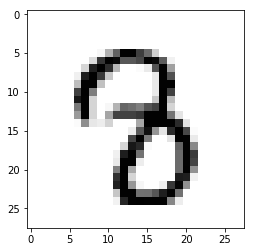

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import random
import time


(x_train_printable, y_train_printable), (x_test_printable, y_test_printable) = mnist.load_data()

rnd =  random.randint(1,10000)
print('index: ', rnd)
plt.imshow(x_test_printable[rnd], cmap=plt.cm.binary)
print(np.argmax(predictions[rnd]))
